# Pandas Python Tutorial
https://www.youtube.com/watch?v=6USMY2jbfB8&list=PL6L9Bma01GyFtJfT0H87-a8KqBpIA1si5&index=1

Recuerda: pd.TAB y pd.nombre_función? para pedir información

In [1]:
import pandas as pd

## Leer fichero csv
NOTA: Shift+Tab (varias veces entre los paréntesis) da información sobre la función y sus parámetros

In [73]:
df = pd.read_csv('provincias.csv',sep=';',skiprows=0)
df.head()

,autonomia,provincia,poblacion,superficie
0,Galicia,La Coruña,1122799,7950
1,Galicia,Lugo,336527,9856
2,Galicia,Orense,314853,7273
3,Galicia,Pontevedra,944346,4494
4,Principado de Asturias,Asturias,1042608,10603


## Gráficos
bar, pie, barh (barras horizontal), scatter

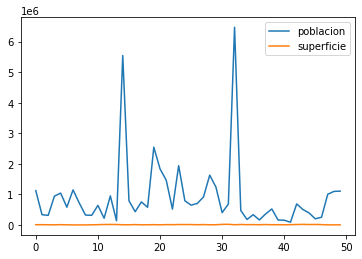

In [25]:
df.plot()

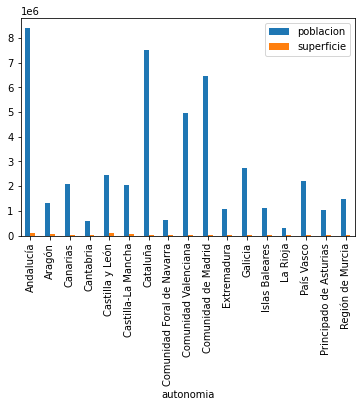

In [26]:
df.groupby('autonomia').sum().plot(kind='bar')

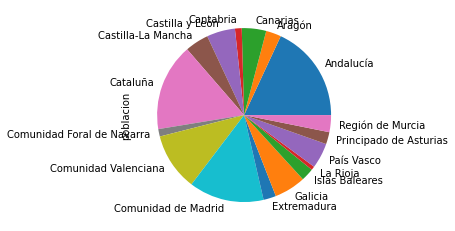

In [27]:
df.groupby('autonomia').sum()['poblacion'].plot(kind='pie')

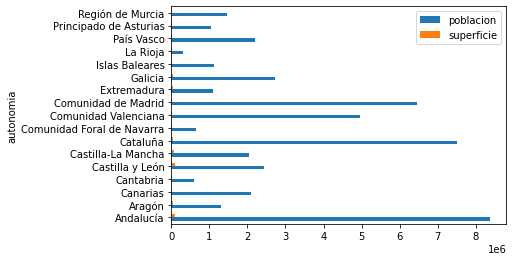

In [29]:
df.groupby('autonomia').sum().plot(kind='barh')

## Iterar entre grupos

In [34]:
for group_key,group_value in df.groupby('autonomia'):
    print(group_key,group_value)

Andalucía     autonomia provincia  poblacion  superficie
22  Andalucía    Huelva     519596       10127
23  Andalucía   Sevilla    1939775       14036
24  Andalucía   Córdoba     791610       13771
25  Andalucía      Jaén     648250       13496
26  Andalucía   Almería     704297        8775
27  Andalucía   Granada     915392       12646
28  Andalucía    Málaga    1629298        7306
29  Andalucía     Cádiz    1239889        7440
Aragón    autonomia provincia  poblacion  superficie
11    Aragón    Huesca     221079       15636
12    Aragón  Zaragoza     950507       17274
13    Aragón    Teruel     136977       14809
Canarias    autonomia               provincia  poblacion  superficie
47  Canarias  Santa Cruz de Tenerife    1004124        3381
48  Canarias              Las Palmas    1097800        4065
Cantabria    autonomia  provincia  poblacion  superficie
5  Cantabria  Cantabria     582206        5321
Castilla y León           autonomia   provincia  poblacion  superficie
33  Castilla

## Función de agregación o agrupación
size, count, first/last, head/tail, max/min, mean, agg (agración, dict)

In [55]:
df.groupby('autonomia').size()

autonomia
Andalucía                     8
Aragón                        3
Canarias                      2
Cantabria                     1
Castilla y León               9
Castilla-La Mancha            5
Cataluña                      4
Comunidad Foral de Navarra    1
Comunidad Valenciana          3
Comunidad de Madrid           1
Extremadura                   2
Galicia                       4
Islas Baleares                1
La Rioja                      1
País Vasco                    3
Principado de Asturias        1
Región de Murcia              1
dtype: int64

### Añado un campo millones con los millones de habitantes de cada provincia

In [53]:
df['millones']=round(df['poblacion']/1e6)
df.head()

,autonomia,provincia,poblacion,superficie,millones
0,Galicia,La Coruña,1122799,7950,1.0
1,Galicia,Lugo,336527,9856,0.0
2,Galicia,Orense,314853,7273,0.0
3,Galicia,Pontevedra,944346,4494,1.0
4,Principado de Asturias,Asturias,1042608,10603,1.0


In [54]:
df.groupby(['autonomia','millones']).agg(['min','max','count'])

provincia                          \
                                             min                     max   
autonomia                  millones                                        
Andalucía                  1.0           Almería                    Jaén   
                           2.0            Málaga                 Sevilla   
Aragón                     0.0            Huesca                  Teruel   
                           1.0          Zaragoza                Zaragoza   
Canarias                   1.0        Las Palmas  Santa Cruz de Tenerife   
Cantabria                  1.0         Cantabria               Cantabria   
Castilla y León            0.0            Burgos                   Ávila   
                           1.0        Valladolid              Valladolid   
Castilla-La Mancha         0.0          Albacete             Guadalajara   
                           1.0       Ciudad Real                  Toledo   
Cataluña                   0.0            Lérida                  Lérida   
                           1.0            Gerona               Tarragona   
                           6.0         Barcelona               Barcelona   
Comunidad Foral de Navarra 1.0           Navarra                 Navarra   
Comunidad Valenciana       1.0         Castellón               Castellón   
                           2.0          Alicante                Alicante   
                           3.0          Valencia                Valencia   
Comunidad de Madrid        6.0            Madrid                  Madrid   
Extremadura                0.0           Cáceres                 Cáceres   
                           1.0           Badajoz                 Badajoz   
Galicia                    0.0              Lugo                  Orense   
                           1.0         La Coruña              Pontevedra   
Islas Baleares             1.0          Baleares                Baleares   
La Rioja                   0.0          La Rioja                La Rioja   
País Vasco                 0.0             Álava                   Álava   
                           1.0         Guipúzcoa                 Vizcaya   
Principado de Asturias     1.0          Asturias                Asturias   
Región de Murcia           1.0            Murcia                  Murcia   

                                          poblacion                superficie  \
                                    count       min      max count        min   
autonomia                  millones                                             
Andalucía                  1.0          6    519596  1239889     6       7440   
                           2.0          2   1629298  1939775     2       7306   
Aragón                     0.0          2    136977   221079     2      14809   
                           1.0          1    950507   950507     1      17274   
Canarias                   1.0          2   1004124  1097800     2       3381   
Cantabria                  1.0          1    582206   582206     1       5321   
Castilla y León            0.0          8     90040   473604     8       6920   
                           1.0          1    523679   523679     1       8110   
Castilla-La Mancha         0.0          3    201071   392118     3      12214   
                           1.0          2    506888   688672     2      15369   
Cataluña                   0.0          1    434041   434041     1      12172   
                           1.0          2    753576   792299     2       5909   
                           6.0          1   5542680  5542680     1       7733   
Comunidad Foral de Navarra 1.0          1    640647   640647     1      10391   
Comunidad Valenciana       1.0          1    579245   579245     1       6636   
                           2.0          1   1836459  1836459     1       5817   
                           3.0          1   2544264  2544264     1      10807   
Comunidad de Madrid        6.0          1   6466996  6466996  

In [45]:
df.groupby(['autonomia','millones']).agg({'poblacion':['min','max','count','sum']})

poblacion                        
                                          min      max count      sum
autonomia                  millones                                  
Andalucía                  1.0         519596  1239889     6  4819034
                           2.0        1629298  1939775     2  3569073
Aragón                     0.0         136977   221079     2   358056
                           1.0         950507   950507     1   950507
Canarias                   1.0        1004124  1097800     2  2101924
Cantabria                  1.0         582206   582206     1   582206
Castilla y León            0.0          90040   473604     8  1923840
                           1.0         523679   523679     1   523679
Castilla-La Mancha         0.0         201071   392118     3   846071
                           1.0         506888   688672     2  1195560
Cataluña                   0.0         434041   434041     1   434041
                           1.0         753576   792299     2  1545875
                           6.0        5542680  5542680     1  5542680
Comunidad Foral de Navarra 1.0         640647   640647     1   640647
Comunidad Valenciana       1.0         579245   579245     1   579245
                           2.0        1836459  1836459     1  1836459
                           3.0        2544264  2544264     1  2544264
Comunidad de Madrid        6.0        6466996  6466996     1  6466996
Extremadura                0.0         403665   403665     1   403665
                           1.0         684113   684113     1   684113
Galicia                    0.0         314853   336527     2   651380
                           1.0         944346  1122799     2  2067145
Islas Baleares             1.0        1107220  1107220     1  1107220
La Rioja                   0.0         315794   315794     1   315794
País Vasco                 0.0         324126   324126     1   324126
                           1.0         717832  1147576     2  1865408
Principado de Asturias     1.0        1042608  1042608     1  1042608
Región de Murcia           1.0        1464847  1464847     1  1464847

In [56]:
df.loc[df.autonomia=='Cataluña'].groupby('millones').agg({'poblacion':['min','max','sum']})

poblacion                  
               min      max      sum
millones                            
0.0         434041   434041   434041
1.0         753576   792299  1545875
6.0        5542680  5542680  5542680

## Indexación
Acceder a una fila o columna usando una etiqueta INMUTABLE

In [60]:
 df.index[22]

22

In [71]:
df[df.autonomia=='Cataluña']

,autonomia,poblacion,superficie,millones
provincia,,,,
Barcelona,Cataluña,5542680,7733,6.0
Tarragona,Cataluña,792299,6302,1.0
Lérida,Cataluña,434041,12172,0.0
Gerona,Cataluña,753576,5909,1.0


In [78]:
#df.set_index('provincia',inplace=True) # inplace para que quede fijado
df.set_index('provincia').head()

,autonomia,poblacion,superficie
provincia,,,
La Coruña,Galicia,1122799,7950
Lugo,Galicia,336527,9856
Orense,Galicia,314853,7273
Pontevedra,Galicia,944346,4494
Asturias,Principado de Asturias,1042608,10603


## Selección y proyección con loc()

In [77]:
df.loc[df['autonomia']=='Cataluña',['provincia','poblacion']]

,provincia,poblacion
14,Barcelona,5542680
15,Tarragona,792299
16,Lérida,434041
17,Gerona,753576
